### Importing the library and necessary modules

In [10]:
!pip install fastai --upgrade

In [11]:
# importing libraries
from fastai.vision.all import *

## CNN Learner for Image Classification

### Dataset - Pets

In [16]:
path = untar_data(URLs.PETS)/'images'

def is_dog(x): 
  return x[0].islower()

dls = ImageDataLoaders.from_name_func(path, get_image_files(path), 
                                      valid_pct=0.2, seed=42,
                                      label_func=is_dog, item_tfms=Resize(224))

learn = cnn_learner(dls, 
                    resnet34, 
                    metrics=error_rate)

learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.131089,0.026201,0.008119,01:19


epoch,train_loss,valid_loss,error_rate,time
0,0.066461,0.005160,0.002706,01:18
1,0.040824,0.012198,0.003383,01:23
2,0.016373,0.003315,0.002030,01:23


Here, Used ImageDataloaders class as our data in in image format.
We have applied items tranformation to resize image in to 224 pixel. Getting data label form images name so using from_name_func. 

For this dataset, all the dogs name are in lower case and cats name are in upper case. valid_pct=0.2 which means that 80% of data will be used for training and 20% of data will be used for testing.

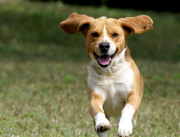

In [22]:

img = PILImage.create('dogs.jpeg')

img.to_thumb(180)

In [23]:
uploader = SimpleNamespace(data = ['dogs.jpeg'])
img = PILImage.create(uploader.data[0])
is_dog,_,probs = learn.predict(img)

print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: True.
Probability it's a dog: 1.000000


## Segmentation UNET Learner

### Dataset - CAMVID_TINY

In [24]:
import gc
    
path = untar_data(URLs.CAMVID_TINY)

print(path)

dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)


gc.collect()

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/root/.fastai/data/camvid_tiny


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,2.930980,2.304734,00:10


epoch,train_loss,valid_loss,time
0,1.890343,1.652137,00:04
1,1.631219,1.344960,00:03
2,1.448581,1.257567,00:03
3,1.307704,1.064741,00:03
4,1.177857,0.884922,00:03
5,1.057580,0.836743,00:03
6,0.960959,0.818295,00:03
7,0.885901,0.813939,00:03


As we can obeserve, in each epoch train_loss is decreasing means our model is improving. 

With fine_tune function, epoch count can be specified. Here, for the memory issue we can decrease the batch size using bs argument.

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


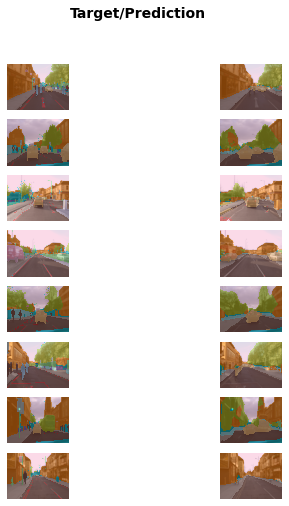

In [25]:
learn.show_results(max_n=9, figsize=(7,8))

## Sentiment Analysis- Text Classifier Learner

In [26]:
from fastai.text.all import *

path = untar_data(URLs.YELP_REVIEWS_POLARITY)
print(path)

dls = TextDataLoaders.from_csv(path=path, csv_fname='test.csv',text_col=1, label_col=0)

learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(5, 1e-2)

/root/.fastai/data/yelp_review_polarity_csv


epoch,train_loss,valid_loss,accuracy,time
0,0.423756,0.323003,0.859060,03:38


epoch,train_loss,valid_loss,accuracy,time
0,0.287469,0.207059,0.915384,08:46
1,0.199634,0.166755,0.930649,08:45
2,0.168690,0.171892,0.929333,08:46
3,0.104914,0.163060,0.939861,08:45
4,0.084024,0.183177,0.934333,08:45


In [27]:
learn.predict("Yeah that movie is not that good")

('2', TensorText(1), TensorText([0.4282, 0.5718]))

## Decision Tree - Tabular Learner

Dataset - ADULT_SAMPLE

In [28]:
from fastai.tabular.all import *

path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [28]:
learn.fit_one_cycle(3)

## Ranking Collab Learner

### Dataset - ML_SAMPLE

In [29]:
from fastai.collab import *

path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.518698,1.428957,00:00


epoch,train_loss,valid_loss,time
0,1.379623,1.371348,00:00
1,1.267706,1.193131,00:00
2,1.019872,0.880414,00:00
3,0.793816,0.735194,00:00
4,0.688957,0.699875,00:00
5,0.647610,0.689681,00:00
6,0.630618,0.686235,00:00
7,0.617971,0.684349,00:00
8,0.608998,0.683370,00:00
9,0.606519,0.683318,00:00


In [30]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,23.0,100.0,3.0,3.566359
1,82.0,62.0,5.0,3.927516
2,89.0,24.0,4.0,3.477477
3,71.0,92.0,5.0,4.290559
4,98.0,56.0,4.5,4.786398
5,65.0,79.0,4.5,3.836644
6,87.0,18.0,4.0,4.559876
7,29.0,15.0,5.0,4.011800
8,2.0,74.0,3.0,3.604620
